__Introduction__
====================
***
For this project, I will be investigating the dataset of over 100k medical appointments from Brazil, focused on whether or not patients show up for their medical appointments

THe dataset has columns of various information about each appointment, including the age and gender of the patient, the date the appointment was scheduled as well as the date of the appointment, the neighbourhood the hospital is located, and information about the patient's ailment: Hypertension, Diabetes, Alcholism, Handicap, etc.

**I will like to investiagte the following about the dataset:**
1. Attendency of patients for male and female
2. Number of patients with or without ailment and scholarship
3. Number of appointments scheduled by gender and by age
4. Age vs Probability of Showing for Appointment

In [535]:
#import libraries sucha as pandas, numpy and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#uses pandas to read file 'noshow.csv'
df = pd.read_csv('noshow.csv')
%matplotlib inline

In [564]:
#check the head of the file to see what does this file look like
df.head()
df['AppointmentDay'].unique()

array(['2016-04-29T00:00:00.000000000', '2016-05-03T00:00:00.000000000',
       '2016-05-10T00:00:00.000000000', '2016-05-17T00:00:00.000000000',
       '2016-05-24T00:00:00.000000000', '2016-05-31T00:00:00.000000000',
       '2016-05-02T00:00:00.000000000', '2016-05-30T00:00:00.000000000',
       '2016-05-16T00:00:00.000000000', '2016-05-04T00:00:00.000000000',
       '2016-05-19T00:00:00.000000000', '2016-05-12T00:00:00.000000000',
       '2016-05-06T00:00:00.000000000', '2016-05-20T00:00:00.000000000',
       '2016-05-05T00:00:00.000000000', '2016-05-13T00:00:00.000000000',
       '2016-05-09T00:00:00.000000000', '2016-05-25T00:00:00.000000000',
       '2016-05-11T00:00:00.000000000', '2016-05-18T00:00:00.000000000',
       '2016-05-14T00:00:00.000000000', '2016-06-02T00:00:00.000000000',
       '2016-06-03T00:00:00.000000000', '2016-06-06T00:00:00.000000000',
       '2016-06-07T00:00:00.000000000', '2016-06-01T00:00:00.000000000',
       '2016-06-08T00:00:00.000000000'], dtype='dat

In [537]:
#check for data types of the dataframe
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [538]:
#Convert PatientId from float to int, although the patientID after conversion is really longbut the original ID 
#is not readable 
df['PatientId'] = df['PatientId'].astype(int)
df['PatientId'].dtypes

dtype('int64')

In [539]:
#Convert both ScheduledDay and AppointmentDay object to datetime just in case if i need to work with dates
df['ScheduledDay'] = pd.to_datetime(df.ScheduledDay)
df['AppointmentDay'] = pd.to_datetime(df.AppointmentDay)
df.dtypes #check the date type again to see if the conversion is successful

PatientId                  int64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

In [540]:
df = df[df.Age != -1] 
#I found a negative number in age so i dropped it by creating the dataframe without -1 for age

In [541]:
#check for duplications in the dataset
df['PatientId'].duplicated().sum()        
df['AppointmentID'].duplicated().sum()

0

In [542]:
#rename columns name, replace - in column name with _, so that the column is callable with name
df.columns = df.columns.str.replace('-','_')

After the exploartion below, i have decided that i want to see the distribution for 
those people who received the sms message but did not show up.
I also want to see separate them by if they have ailment and if they had scholarship
Are the patients male dominant or female dominant.

In [555]:
#function built to calculate the attendancy of patients
def per_noshow(DataFrame,feature,feature_value):
    no_show = DataFrame[(DataFrame['No_show']=='Yes')&(DataFrame[feature]==feature_value)]['No_show'].count()
    total =DataFrame[DataFrame[feature]==feature_value][feature].count()
    return round((no_show))

def per_show(DataFrame,feature,feature_value):
    no_show = DataFrame[(DataFrame['No_show']=='No')&(DataFrame[feature]==feature_value)]['No_show'].count()
    total =DataFrame[DataFrame[feature]==feature_value][feature].count()
    return round((no_show))

In [524]:
#explore the distribution for not showing up in the appointment for male and female 

female_no_show = per_noshow(df,'Gender','F') #14594 
male_no_show = per_noshow(df,'Gender','M') #7725

female_show = per_show(df,'Gender','F') #57245
male_show = per_show(df,'Gender','M') # 30962


PatientId         30962
AppointmentID     30962
Gender            30962
ScheduledDay      30962
AppointmentDay    30962
Age               30962
Neighbourhood     30962
Scholarship       30962
Hipertension      30962
Diabetes          30962
Alcoholism        30962
Handcap           30962
SMS_received      30962
No_show           30962
dtype: int64

Text(0.5,1,'Attendency of patients')

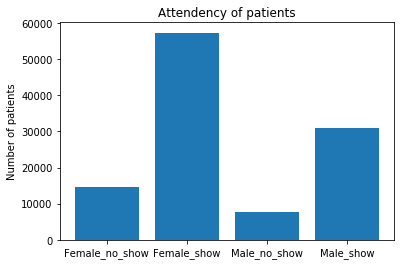

In [561]:
#draw the graph to visualise the distribution above
plt.bar(['Female_show','Male_show','Female_no_show','Male_no_show'],[57245,30962,14594,7725]);
plt.ylabel('Number of patients')
plt.title('Attendency of patients')

Below ar 8 selections for male and female patients who received the sms but did not show up 
other varibale are if they have welfare or not and if they have 0 or 1 or more ailment 

In [325]:

#count patients-SMS received, did not show, Female with scholarship. have 1 or more symptoms listed 
df.loc[(df.SMS_received == 1) & (df.No_show == 'Yes') & (df.Gender == 'F') & 
       (df.Scholarship == 1)&((df.Hipertension == 1) | 
        (df.Diabetes== 1) | (df.Alcoholism ==1) | (df.Handcap ==1)),'Scholarship':].count()

#SMS received, did not show, Female with scholarship. 0 symptoms listed 
df.loc[(df.SMS_received == 1) & (df.No_show == 'Yes') & (df.Gender == 'F') & 
       (df.Scholarship == 1) & (df.Hipertension == 0) & (df.Diabetes== 0) & (df.Alcoholism ==0)
                                & (df.Handcap ==0),'Scholarship':].count()

Scholarship     799
Hipertension    799
Diabetes        799
Alcoholism      799
Handcap         799
SMS_received    799
No_show         799
dtype: int64

In [326]:
#count patients-SMS received, did not show, Male with scholarship. have 1 or more symptoms listed 
df.loc[(df.SMS_received == 1) & (df.No_show == 'Yes') & (df.Gender == 'M') & 
       (df.Scholarship == 1) &((df.Hipertension == 1) | (df.Diabetes== 1) | (df.Alcoholism ==1) | 
                               (df.Handcap ==1)),'Scholarship':].count()

#count patients-SMS received, did not show, Male with scholarship. have 0 symptoms listed 
df.loc[(df.SMS_received == 1) & (df.No_show == 'Yes') & (df.Gender == 'M') & 
       (df.Scholarship == 1) & (df.Hipertension == 0) & (df.Diabetes== 0) & (df.Alcoholism ==0) & 
                                (df.Handcap ==0),'Scholarship':].count()

Scholarship     154
Hipertension    154
Diabetes        154
Alcoholism      154
Handcap         154
SMS_received    154
No_show         154
dtype: int64

In [327]:
#count patients-SMS received, did not show, Male without scholarship. 0 symptoms listed 
df.loc[(df.SMS_received == 1) & (df.No_show == 'Yes') & (df.Gender == 'M') & 
       (df.Scholarship == 0) & (df.Hipertension == 0) & (df.Diabetes== 0) & (df.Alcoholism ==0) & 
                                (df.Handcap ==0),'Scholarship':].count()


#count patients-SMS received, did not show, Male without scholarship. have 1 or more symptoms listed 
df.loc[(df.SMS_received == 1) & (df.No_show == 'Yes') & (df.Gender == 'M')
       & (df.Scholarship == 0) &((df.Hipertension == 1) | (df.Diabetes== 1)
                                 | (df.Alcoholism ==1) | (df.Handcap ==1)),'Scholarship':].count()

Scholarship     579
Hipertension    579
Diabetes        579
Alcoholism      579
Handcap         579
SMS_received    579
No_show         579
dtype: int64

In [328]:
#count patients-SMS received, did not show, Female without scholarship. 0 symptoms listed 
df.loc[(df.SMS_received == 1) & (df.No_show == 'Yes') & (df.Gender == 'F') & 
       (df.Scholarship == 0) & (df.Hipertension == 0) & (df.Diabetes== 0) & (df.Alcoholism ==0) & 
                                (df.Handcap ==0),'Scholarship':].count()

#count patients-SMS received, did not show, Female without scholarship. have 1 or more symptoms listed 
# df.loc[(df.SMS_received == 1) & (df.No_show == 'Yes') & (df.Gender == 'F') & 
#        (df.Scholarship == 0) &((df.Hipertension == 1) | (df.Diabetes== 1) | 
#                                (df.Alcoholism ==1) | (df.Handcap ==1)),'Scholarship':].count()

Scholarship     4612
Hipertension    4612
Diabetes        4612
Alcoholism      4612
Handcap         4612
SMS_received    4612
No_show         4612
dtype: int64

In [329]:
category = ['S-0','NS-0','S-1p','NS-1p'] #label on the x-axis
male = [154,2459,19,579]  #data selected previously for male
female = [799,4612,212,1096] #data selected previously for female
xpos = np.arange(len(category))  #get the length of the x-axis

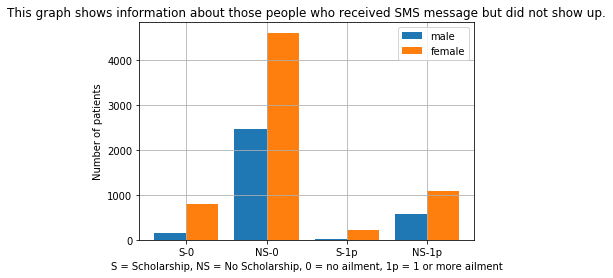

In [565]:
#draw the bar chart
plt.xticks(xpos,category)
plt.xlabel('S = Scholarship, NS = No Scholarship, 0 = no ailment, 1p = 1 or more ailment')
plt.ylabel('Number of patients')
plt.title('This graph shows information about those people who received SMS message but did not show up.')
plt.bar(xpos-0.2,male,width = 0.4,label='male')
plt.bar(xpos+0.2,female, width = 0.4,label='female')
plt.grid()
plt.legend()

In this graph, we can vividly see that there are more female patient than male patient. The highest figure can be seen in the caregory of femlae-no scholarship with no ailment. The lowest figure can be found in the category of male - scholarship with 1 or more ailment. For the group of people who has received SMS message, they are not likely to show up if they had no ailment and no scholariship. 

The distribution for group NS-1p and S-0 are quite similar, however, NS-1p is relatively higher when compared to S-0. It is worth note the numebr of male patients drops significantly from NS-1p to S-0.

Overll, female patients almost doubles the number of male. At the end, the S-1P group has the lowest figure in the diagram which means that they are likely to show up, which means those people who enrolled in the welfare program in Brazil with ailment are most likely show up to the appointment. 


In [336]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


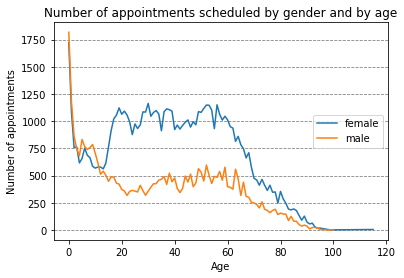

In [486]:
#plot line chart for this 
#separate male and female
female_data = df[df.Gender == 'F']
female_age_appointmentID = female_data.groupby('Age')['AppointmentID'].count()
male_data = df[df.Gender == 'M']
male_age_appointmentID = male_data.groupby('Age')['AppointmentID'].count()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(female_age_appointmentID,label = 'female')
ax.plot(male_age_appointmentID,label = 'male')
ax.set_title('Number of appointments scheduled by gender and by age')
ax.set_xlabel('Age')
ax.set_ylabel('Number of appointments')
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.legend(loc = 'right')

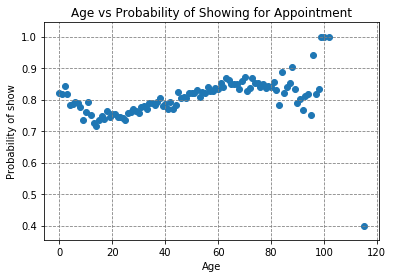

In [519]:
#Age vs probability of showing for appointment

groupby_age = df.groupby('Age')['No_show'].count() #people counted with group
groupby_age.head()

df_showed = df[df.No_show == 'No']   #showed up
age_grouped_show = df_showed.groupby('Age')['No_show'].count()
age = showup_probability_with_age.index.get_values()

showup_probability_with_age = age_grouped_show / groupby_age
plt.scatter(age,showup_probability_with_age)
plt.xlabel('Age')
plt.ylabel('Probability of show')
plt.title('Age vs Probability of Showing for Appointment')
plt.grid(color='gray', linestyle='dashed')


__Conclusion__
====================
1. There are more female patients than male patients and infants has the highest appointment frequencies
2. Patients around the age of 18 are least likely to show up to an appointment
3. Patients with 0 ailments and without scholarship are less likely to show up to an appointment
4. Patients with 1 or more ailments and with scholarship are likely to show up to an appointment


**Limitations in this dataset**

There are many conclusions that can be drawm from this short data analysis that need to be done carefully. None of the trends observed imply causation, just correlation. One important thing to note is that this data spans appointments made in a timeframe of just over 2 months. This is important to consider because it is difficult to make exact predictions given just a small timeframe of data. It would be much better if a whole year or more were considered here. 
